In [1]:
import rpy2

%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
%%R
a <- read_delim('../results/model/Nested_model/log_ne_log_cm_sd_pi/a_24_04_2024.tsv', delim="\t")
b <- read_delim('../results/model/Nested_model/log_ne_log_cm_sd_pi/b_24_04_2024.tsv', delim="\t")
h0 <- read_delim('../results/model/Nested_model/log_ne_log_cm_sd_pi/h0_24_04_2024.tsv', delim="\t")
h1 <- read_delim('../results/model/Nested_model/log_ne_log_cm_sd_pi/h1_24_04_2024.tsv', delim ="\t")

Rows: 1496000 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (3): chain, draw, a

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1496000 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (3): chain, draw, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): chain, draw, h0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ───────────────────

In [7]:
%%R
a

# A tibble: 1,496,000 × 4
   chain  draw Species                          a
   <dbl> <dbl> <chr>                        <dbl>
 1     0     0 Allenopithecus_nigroviridis 0.0232
 2     0     0 Allochrocebus_lhoesti       0.0492
 3     0     0 Allochrocebus_preussi       0.0395
 4     0     0 Allochrocebus_solatus       0.0343
 5     0     0 Alouatta_belzebul           0.0344
 6     0     0 Alouatta_caraya             0.0375
 7     0     0 Alouatta_discolor           0.0427
 8     0     0 Alouatta_juara              0.0418
 9     0     0 Alouatta_macconnelli        0.0457
10     0     0 Alouatta_nigerrima          0.0508
# ℹ 1,495,990 more rows
# ℹ Use `print(n = ...)` to see more rows


In [9]:
%%R
b

# A tibble: 1,496,000 × 4
   chain  draw Species                          b
   <dbl> <dbl> <chr>                        <dbl>
 1     0     0 Allenopithecus_nigroviridis 0.102 
 2     0     0 Allochrocebus_lhoesti       0.140 
 3     0     0 Allochrocebus_preussi       0.124 
 4     0     0 Allochrocebus_solatus       0.103 
 5     0     0 Alouatta_belzebul           0.140 
 6     0     0 Alouatta_caraya             0.0880
 7     0     0 Alouatta_discolor           0.179 
 8     0     0 Alouatta_juara              0.159 
 9     0     0 Alouatta_macconnelli        0.198 
10     0     0 Alouatta_nigerrima          0.204 
# ℹ 1,495,990 more rows
# ℹ Use `print(n = ...)` to see more rows


In [11]:
%%R
df <- left_join(a,b,by=c('chain'='chain','draw'='draw','Species'='Species'))
df

# A tibble: 1,496,000 × 5
   chain  draw Species                          a      b
   <dbl> <dbl> <chr>                        <dbl>  <dbl>
 1     0     0 Allenopithecus_nigroviridis 0.0232 0.102 
 2     0     0 Allochrocebus_lhoesti       0.0492 0.140 
 3     0     0 Allochrocebus_preussi       0.0395 0.124 
 4     0     0 Allochrocebus_solatus       0.0343 0.103 
 5     0     0 Alouatta_belzebul           0.0344 0.140 
 6     0     0 Alouatta_caraya             0.0375 0.0880
 7     0     0 Alouatta_discolor           0.0427 0.179 
 8     0     0 Alouatta_juara              0.0418 0.159 
 9     0     0 Alouatta_macconnelli        0.0457 0.198 
10     0     0 Alouatta_nigerrima          0.0508 0.204 
# ℹ 1,495,990 more rows
# ℹ Use `print(n = ...)` to see more rows


In [18]:
%%R
df <- df %>% mutate(pi_zero = a + b * log10(100)) %>%
    group_by(Species) %>%
    reframe(pi_zero_median = median(pi_zero))

In [15]:
%%R
nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_MEDIAN')
nes <- nes %>% 
    group_by(genus,species) %>%
    reframe(
        NE_MEAN = mean(NE_MEAN),
        NE_MEDIAN = mean(NE_MEDIAN))
nes <- nes %>% mutate(Species=paste0(genus,'_',species))


New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
%%R
df2 <- left_join(df,nes,by= c('Species'='Species'))
df2

# A tibble: 187 × 6
   Species                     pi_zero_median genus    species NE_MEAN NE_MEDIAN
   <chr>                                <dbl> <chr>    <chr>     <dbl>     <dbl>
 1 Allenopithecus_nigroviridis          0.241 Allenop… nigrov…  52454.    48795.
 2 Allochrocebus_lhoesti                0.331 Allochr… lhoesti  91523.    83266.
 3 Allochrocebus_preussi                0.265 Allochr… preussi  98962.    91644.
 4 Allochrocebus_solatus                0.247 Allochr… solatus 110522.   101523.
 5 Alouatta_belzebul                    0.300 Alouatta belzeb…  59406.    54570.
 6 Alouatta_caraya                      0.193 Alouatta caraya   37473.    35650.
 7 Alouatta_discolor                    0.406 Alouatta discol…  75638.    66639.
 8 Alouatta_juara                       0.359 Alouatta juara    70735.    65093.
 9 Alouatta_macconnelli                 0.454 Alouatta maccon…  67134.    61665.
10 Alouatta_nigerrima                   0.468 Alouatta nigerr…  69902.    64414.
# ℹ 177 

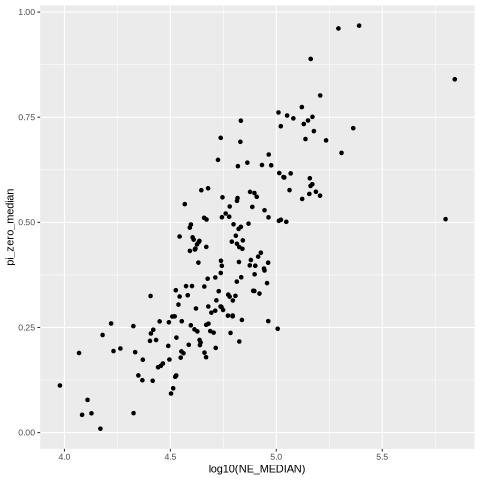

In [21]:
%%R
df2 %>%
    ggplot(aes(x=log10(NE_MEDIAN),y=pi_zero_median))+
    geom_point()

In [23]:
%%R
df20 <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(genus,species) %>% filter(!(chr=='chrX')) %>% filter(freq_mean > 0.5) %>% mutate(recomb_bin = ntile(cm_per_mb, 20))
df20 <- df20 %>% mutate(Species = paste0(genus,'_',species))

Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
%%R
df3 <- left_join(df2,df20,by = c('Species'='Species'))
df3

# A tibble: 4,082,964 × 23
   Species       pi_zero_median genus.x species.x NE_MEAN NE_MEDIAN chr    start
   <chr>                  <dbl> <chr>   <chr>       <dbl>     <dbl> <chr>  <dbl>
 1 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  1.60e6
 2 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  1.80e6
 3 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  1.90e6
 4 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.00e6
 5 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.10e6
 6 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.20e6
 7 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.30e6
 8 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.40e6
 9 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.50e6
10 Allenopithec…          0.241 Alleno… nigrovir…  52454.    48795. chr1  2.80e6
#

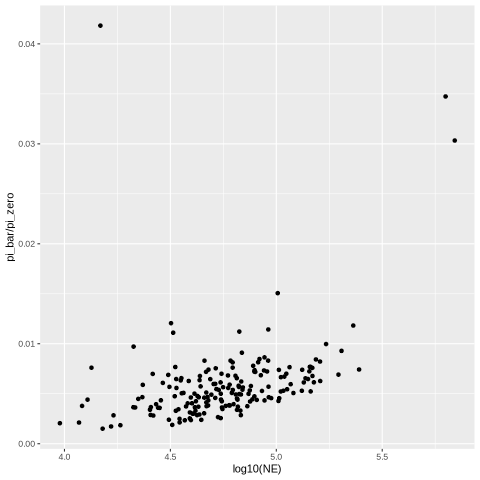

In [28]:
%%R
df3 %>%
    group_by(Species) %>%
    reframe(
        NE = median(NE_MEDIAN),
        pi_zero = median(pi_zero_median),
        pi_bar = median(PI)) %>%
    ggplot(aes(x=log10(NE),y=pi_bar/pi_zero))+
    geom_point()